In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [16]:
img = plt.imread("D:/remote/datasets/clustering/data.jpeg")
img.shape

(656, 656, 3)

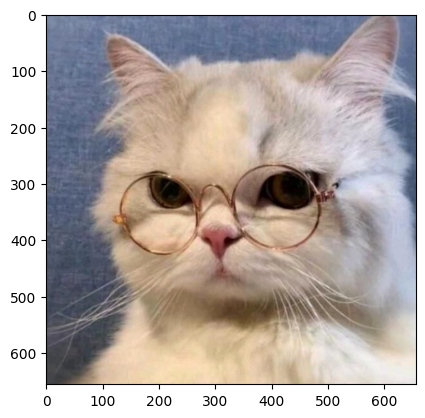

In [17]:
plt.imshow(img)

Buat tiap pixel jadi data

In [18]:
img = img.reshape(-1, 3)
img

array([[121, 135, 162],
       [123, 137, 164],
       [125, 139, 166],
       ...,
       [230, 232, 229],
       [230, 232, 229],
       [230, 232, 229]], dtype=uint8)

In [19]:
len(img) # total pixel

430336

In [20]:
len(np.unique(img, axis=0)) # total unique pixel

61648

Cluster 61648 colors into 8 color palette

In [41]:
kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(img)

c:\Users\Kresna\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [43]:
palette = kmeans.cluster_centers_.astype(int)
palette

array([[210, 206, 211],
       [ 81,  78,  84],
       [195, 176, 162],
       [102, 114, 142],
       [ 34,  18,   9],
       [230, 203, 173],
       [142, 116,  97],
       [171, 150, 136]])

In [44]:
quantized_img = palette[labels].reshape(656, 656, 3)
quantized_img

array([[[102, 114, 142],
        [102, 114, 142],
        [102, 114, 142],
        ...,
        [102, 114, 142],
        [102, 114, 142],
        [102, 114, 142]],

       [[102, 114, 142],
        [102, 114, 142],
        [102, 114, 142],
        ...,
        [102, 114, 142],
        [102, 114, 142],
        [102, 114, 142]],

       [[102, 114, 142],
        [102, 114, 142],
        [102, 114, 142],
        ...,
        [102, 114, 142],
        [102, 114, 142],
        [102, 114, 142]],

       ...,

       [[ 81,  78,  84],
        [ 81,  78,  84],
        [ 81,  78,  84],
        ...,
        [210, 206, 211],
        [210, 206, 211],
        [210, 206, 211]],

       [[ 81,  78,  84],
        [ 81,  78,  84],
        [ 81,  78,  84],
        ...,
        [210, 206, 211],
        [210, 206, 211],
        [210, 206, 211]],

       [[ 81,  78,  84],
        [ 81,  78,  84],
        [ 81,  78,  84],
        ...,
        [210, 206, 211],
        [210, 206, 211],
        [210, 206, 211]]

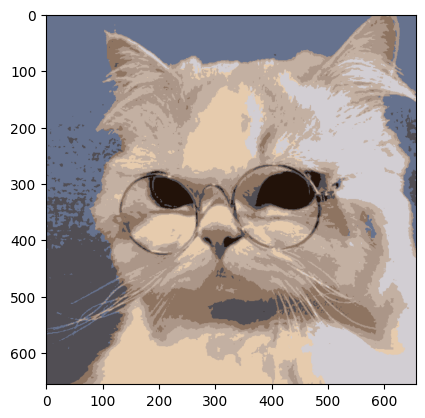

In [45]:
plt.imshow(quantized_img)

In [46]:
def quantize(img, n_palette):
    n_unique = len(np.unique(img.reshape(-1, 3), axis=0))

    kmeans = KMeans(n_clusters=n_palette, random_state=42)
    labels = kmeans.fit_predict(img.reshape(-1, 3))
    pallette = kmeans.cluster_centers_.astype(int)
    quantized_img = pallette[labels].reshape(*img.shape)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original Image ({n_unique} colors)")
    plt.xticks([]); plt.yticks([])
    
    plt.subplot(1, 2, 2)
    plt.imshow(quantized_img)
    plt.title(f"Quantized Image ({n_palette} colors)")
    plt.xticks([]); plt.yticks([])

c:\Users\Kresna\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


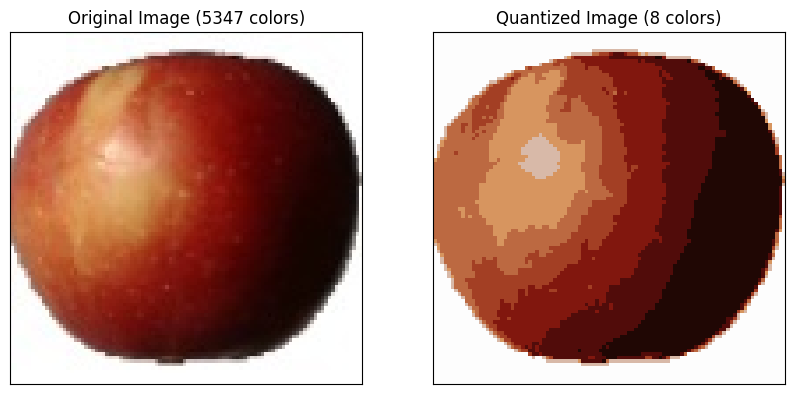

In [47]:
img = plt.imread("assets/apple.jpg")
quantize(img, 8)

c:\Users\Kresna\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


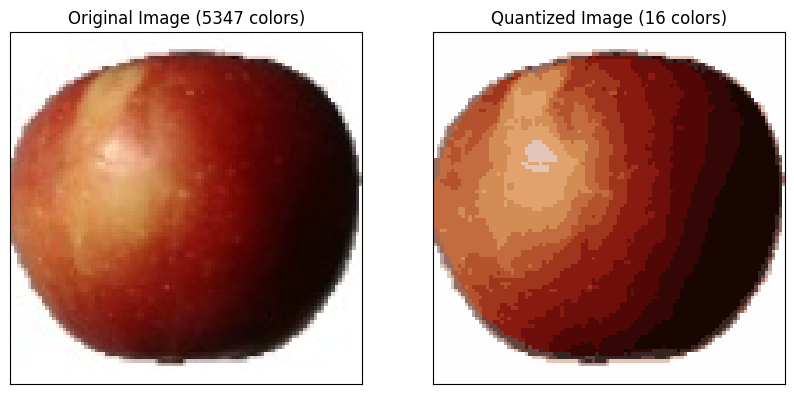

In [50]:
img = plt.imread("assets/apple.jpg")
quantize(img, 16)